In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
# from ipyvizzu import Chart, Data, Config
import arabic_reshaper
from bidi.algorithm import get_display
import re

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
data = pd.read_csv("Jadarat_data.csv/Jadarat_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
data.head()
# drop------
# comp_no
#positions
#job_post_id

#edit --------
# city
# benefits
# positions
# exper


job_title    job_date  \
0                      محاسب  27/05/1444   
1                       بائع  27/05/1444   
2  أخصائي عمليات موارد بشرية  27/05/1444   
3            ميكانيكي سيارات  27/05/1444   
4                      محاسب  27/05/1444   

                                            job_desc  \
0  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2  ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3  ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4  ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   

                                           job_tasks  \
0  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2  ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3  ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4  ['   تدقيق المطالبات المالية والتأكد من اكتمال...   

                      comp_name    comp_no comp_type     comp_size  \
0      شركة مقر العالم للسفريات   1-317262       خاص  متوسطة فئة أ   
1  شركة عالم الكهرباء للمقاولات  4-1324428       خاص  متوسطة فئة ب   
2               شركه دار السلام   1-155294       خاص  متوسطة فئة أ   
3       مؤسسة لمكو لغيار الزيوت  8-1925495       خاص   صغيرة فئة ب   
4  مؤسسة فكرة اليمامة للمقاولات  1-2356639       خاص         كبيرة   

                                        eco_activity  \
0                        أنشطة وكالات السياحة والسفر   
1  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2               ترميمات المباني السكنية والغير سكنية   
3                                                NaN   
4                   الإنشاءات العامة للمباني السكنية   

                                              qualif           region  \
0     ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                NaN  المنطقة الشرقية   
2           ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3  ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4  ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   

           city              benefits   contract positions     job_post_id  \
0  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350419   
1  AD DAMMAM...  ['Salary', '5000.0']  دوام كامل     0 / 3  20202026350389   
2  ATH THUMA...  ['Salary', '4000.0']  دوام كامل     0 / 2  20202026350347   
3   AL HUFUF...  ['Salary', '5000.0']  دوام كامل    0 / 10  20202026350219   
4  AR RIYADH...  ['Salary', '5000.0']  دوام كامل     0 / 1  20202026350043   

     exper gender  
0  0 Years   both  
1  0 Years   both  
2  2 Years   both  
3  0 Years      M  
4  0 Years   both

In [5]:
data.shape

(1470, 18)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [6]:
# profile = ProfileReport(data, title="Profiling Report")
# profile

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [7]:
#the data is from Jadarat so it is reliable 

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [8]:
#the time 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [9]:
data.dtypes



job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
job_post_id      int64
exper           object
gender          object
dtype: object

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [10]:
data.head()
# drop------
# comp_no
#job_post_id

#edit --------
# city
# benefits
# positions
# exper

data.drop(["comp_no", "job_post_id", "job_date"], axis=1, inplace=True)


In [11]:
data.columns

Index(['job_title', 'job_desc', 'job_tasks', 'comp_name', 'comp_type',
       'comp_size', 'eco_activity', 'qualif', 'region', 'city', 'benefits',
       'contract', 'positions', 'exper', 'gender'],
      dtype='object')

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [12]:
data.duplicated().sum() 

55

In [13]:
data[data.duplicated()] 

job_title  \
237               محضر أطعمة باردة   
355                           بائع   
384                    مهندس زراعي   
487                          محامي   
624                    مهندس شبكات   
723                     محلل مبرمج   
910              موظف استقبال فندق   
911              أخصائي علاج طبيعي   
912              أخصائي علاج طبيعي   
913                     مدير إداري   
914                     مشرف صيانة   
915                           بائع   
917                   موظف استقبال   
918                     سائق سيارة   
919                     مدير إداري   
922   عامل كاونتر مأكولات ومشروبات   
937                      مدير مطعم   
941                   مندوب مبيعات   
952              موظف استقبال فندق   
953                   موظف استقبال   
954                           بائع   
955                           بائع   
956                      مدير مكتب   
957                  سكرتير تنفيذي   
960       فني عمليات تقنية معلومات   
961                   أخصائي تسويق   
1091           أخصائي مختبرات طبية   
1131                          نادل   
1132                طيار جناح ثابت   
1133                 سكرتير تنفيذي   
1134                     مدير مالي   
1135              كاتب موارد بشرية   
1136                  موظف استقبال   
1137                     منسق زهور   
1139                    مساح كميات   
1140               فني هندسة مدنية   
1141                   مصمم جرافيك   
1142                 أخصائي مبيعات   
1143                    مهندس مدني   
1144                    مهندس مدني   
1145                    أمين صندوق   
1146        مدير أشغال ومرافق عامة   
1147                  موظف استقبال   
1148                         محاسب   
1149             أخصائي خدمة عملاء   
1150             موظف استقبال فندق   
1151                     مدير مطعم   
1154                          بائع   
1155                   رئيس تنفيذي   
1156                          نادل   
1157  عامل كاونتر مأكولات ومشروبات   
1158                 مندوب مشتريات   
1213            مهندس معماري داخلي   
1383                     مدير مقهى   
1469                         صيدلي   

                                               job_desc  \
237   ['تحديد الأدوات والمواد والمستلزمات اللازمة لإ...   
355   ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
384   ['دراسة خصائص ومكونات الأراضي والتربة الزراعية...   
487   ['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...   
624   ['إعداد مخططات ومواصفات خطوط شبكات الحاسب الآل...   
723   ['القيام بالتحليل والبرمجة في تطوير وتنفيذ ودع...   
910   ['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...   
911   ['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...   
912   ['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...   
913   ['The Project Manager (PM) are the responsible...   
914   ['إعداد خطة وبرنامج العمل، ومتابعة إجراءات تحد...   
915   ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
917   ['استقبال الزوار والعملاء وتحديد مطالبهم وتوجي...   
918   ['تولي مهمة قيادة السيارة بغرض القيام بالأعمال...   
919   ['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...   
922   ['تحضير وتقديم  الطعام والشراب في الأماكن العا...   
937   ['تخطيط عمليات المطعم وتوجيهها وتنسيقها، وإدار...   
941   ['جمع البيانات والمواصفات المتعلقة بالمنتجات (...   
952   ['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...   
953   ['استقبال الزوار والعملاء وتحديد مطالبهم وتوجي...   
954   ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
955   ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
956   ['الإشراف المباشرعلى أنشطة إدارة وتخطيط وتنظيم...   
957   ['تنظيم المواعيد وإعداد المذكرات وإجراء المراس...   
960   ['تطبيق وتنفيذ الخطط المتعلقة بعمليات تقنية ال...   
961   ['تحديد الأهداف وتطوير السياسات التسويقية للسل...   
1091  ['تحديد احتياجات المختبر من المواد الأولية الل...   
1131  ['استقبال العملاء وتزويدهم بقوائم الاطعمة والم...   
1132  ['تدقيق بيانات الرحلة وخطة الطيران، وتفقد وتجه...   
1133  ['تنظيم المواعيد وإعداد المذكرات وإجراء المراس...   
1134  ['المشاركة في تطوير الأهداف الرئيسية للإدارة ا...   
1135  ['

In [14]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [15]:
data.isnull().sum().sort_values(ascending = False)

qualif          690
eco_activity     90
comp_size        14
job_title         0
job_desc          0
job_tasks         0
comp_name         0
comp_type         0
region            0
city              0
benefits          0
contract          0
positions         0
exper             0
gender            0
dtype: int64

In [16]:
# حذف nan
data['qualif'].fillna('لايوجد', inplace=True)
data

C:\Users\abuda\AppData\Local\Temp\ipykernel_18656\2367851038.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['qualif'].fillna('لايوجد', inplace=True)


job_title  \
0                         محاسب   
1                          بائع   
2     أخصائي عمليات موارد بشرية   
3               ميكانيكي سيارات   
4                         محاسب   
...                         ...   
1465        مهندس تقنية معلومات   
1466                     سكرتير   
1467                      صيدلي   
1468        مشغل آلة تشطيب رخام   
1469                      صيدلي   

                                               job_desc  \
0     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2     ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3     ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
...                                                 ...   
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   
1466  ['دعم المدير أو الإدارة من خلال كتابة الوثائق ...   
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   
1469  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
0     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2     ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3     ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
...                                                 ...   
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   
1466  ['   تدوين الملاحظات، التي يتم إملاؤها، بطريقة...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                              comp_name comp_type  \
0                              شركة مقر العالم للسفريات       خاص   
1                          شركة عالم الكهرباء للمقاولات       خاص   
2                                       شركه دار السلام       خاص   
3                               مؤسسة لمكو لغيار الزيوت       خاص   
4                          مؤسسة فكرة اليمامة للمقاولات       خاص   
...                                                 ...       ...   
1465                  مطعم الاوراق الخضر لتقديم الوجبات       خاص   
1466         شركة ملتقى التجار لحاضنات و مسرعات الأعمال       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...       خاص   
1469                شركة تقنية الدواجن والألبان للتجارة       خاص   

         comp_size                                       eco_activity  \
0     متوسطة فئة أ                        أنشطة وكالات السياحة والسفر   
1     متوسطة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2     متوسطة فئة أ               ترميمات المباني السكنية والغير سكنية   
3      صغيرة فئة ب                                                NaN   
4            كبيرة                   الإنشاءات العامة للمباني السكنية   
...            ...                                                ...   
1465   صغيرة فئة ب                                  المطاعم مع الخدمة   
1466   صغيرة فئة ب                       أنشطة حاضنات ومسرعات الأعمال   
1467   صغيرة فئة ب                                                NaN   
1468   صغيرة فئة أ                                                NaN   
1469   صغيرة فئة ب                                                NaN   

                                                 qualif           region  \
0        ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                لايوجد  المنطقة الشرقية   
2              ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3     ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4     ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   
...                  

In [17]:
# حذف nan
data['eco_activity'].fillna('اخرى', inplace=True)
data


C:\Users\abuda\AppData\Local\Temp\ipykernel_18656\4203547618.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['eco_activity'].fillna('اخرى', inplace=True)


job_title  \
0                         محاسب   
1                          بائع   
2     أخصائي عمليات موارد بشرية   
3               ميكانيكي سيارات   
4                         محاسب   
...                         ...   
1465        مهندس تقنية معلومات   
1466                     سكرتير   
1467                      صيدلي   
1468        مشغل آلة تشطيب رخام   
1469                      صيدلي   

                                               job_desc  \
0     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2     ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3     ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
...                                                 ...   
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   
1466  ['دعم المدير أو الإدارة من خلال كتابة الوثائق ...   
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   
1469  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
0     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2     ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3     ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
...                                                 ...   
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   
1466  ['   تدوين الملاحظات، التي يتم إملاؤها، بطريقة...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                              comp_name comp_type  \
0                              شركة مقر العالم للسفريات       خاص   
1                          شركة عالم الكهرباء للمقاولات       خاص   
2                                       شركه دار السلام       خاص   
3                               مؤسسة لمكو لغيار الزيوت       خاص   
4                          مؤسسة فكرة اليمامة للمقاولات       خاص   
...                                                 ...       ...   
1465                  مطعم الاوراق الخضر لتقديم الوجبات       خاص   
1466         شركة ملتقى التجار لحاضنات و مسرعات الأعمال       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...       خاص   
1469                شركة تقنية الدواجن والألبان للتجارة       خاص   

         comp_size                                       eco_activity  \
0     متوسطة فئة أ                        أنشطة وكالات السياحة والسفر   
1     متوسطة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2     متوسطة فئة أ               ترميمات المباني السكنية والغير سكنية   
3      صغيرة فئة ب                                               اخرى   
4            كبيرة                   الإنشاءات العامة للمباني السكنية   
...            ...                                                ...   
1465   صغيرة فئة ب                                  المطاعم مع الخدمة   
1466   صغيرة فئة ب                       أنشطة حاضنات ومسرعات الأعمال   
1467   صغيرة فئة ب                                               اخرى   
1468   صغيرة فئة أ                                               اخرى   
1469   صغيرة فئة ب                                               اخرى   

                                                 qualif           region  \
0        ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                لايوجد  المنطقة الشرقية   
2              ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3     ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4     ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   
...                  

In [18]:
data['comp_size'].fillna('اخرى', inplace=True)


C:\Users\abuda\AppData\Local\Temp\ipykernel_18656\1468779301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['comp_size'].fillna('اخرى', inplace=True)


In [19]:
data.columns


# benefits
# exper

Index(['job_title', 'job_desc', 'job_tasks', 'comp_name', 'comp_type',
       'comp_size', 'eco_activity', 'qualif', 'region', 'city', 'benefits',
       'contract', 'positions', 'exper', 'gender'],
      dtype='object')

In [20]:
data['benefits'].unique()

array(["['Salary', '5000.0']", "['Salary', '4000.0']",
       "['Salary', '4500.0']", "['Salary', '6000.0']",
       "['Salary', '8000.0']", "['Salary', '10000.0']",
       "['Salary', '7200.0', 'Benefits', 'بدل نقل 800 ريال']",
       "['Salary', '7000.0']", "['Salary', '3000.0']",
       "['Salary', '9000.0']", "['Salary', '12000.0']",
       "['Salary', '5500.0']", "['Salary', '8400.0']",
       "['Salary', '4000.0', 'Benefits', '500']",
       "['Salary', '4000.0', 'Benefits', '2000']",
       "['Salary', '4000.0', 'Benefits', 'تأمين طبي حسب نظام مكتب العمل']",
       "['Salary', '4000.0', 'Benefits', '1000 حسب الخبره']",
       "['Salary', '4000.0', 'Benefits', '4000 SR']",
       "['Salary', '3200.0', 'Benefits', '3200 ريال']",
       "['Salary', '5000.0', 'Benefits', '500 بدل نقل و500 بدل سكن وتامين طبي']",
       "['Salary', '4500.0', 'Benefits', 'حسب سنوات الخبرة']",
       "['Salary', '4500.0', 'Benefits', 'تارقت شهري', 'بونص سنوي']",
       "['Salary', '4500.0', 'Benefits', 

In [21]:
data[data['qualif'].isnull()]

Empty DataFrame
Columns: [job_title, job_desc, job_tasks, comp_name, comp_type, comp_size, eco_activity, qualif, region, city, benefits, contract, positions, exper, gender]
Index: []

In [22]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [23]:
# check columns types 

In [24]:
# go to clean them 

In [25]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [26]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [27]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [28]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [29]:
data['benefits']

0                                    ['Salary', '5000.0']
1                                    ['Salary', '5000.0']
2                                    ['Salary', '4000.0']
3                                    ['Salary', '5000.0']
4                                    ['Salary', '5000.0']
                              ...                        
1465                                 ['Salary', '5500.0']
1466                                 ['Salary', '4000.0']
1467                                 ['Salary', '7000.0']
1468    ['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...
1469                                 ['Salary', '7000.0']
Name: benefits, Length: 1470, dtype: object

In [30]:
#  بطلع الرقم من السترانق
data['Salary']=data['benefits'].map(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)
# data['Salary'] = data['benefits'].apply(lambda x: sum(map(int, re.findall(r'\d+', x)))if  sum(map(int, re.findall(r'\d+', x))) <30000 else re.search(r'\d+', x).group())
# data['Salary'] = data['benefits'].apply(lambda x: sum(map(int, re.findall(r'\d+', x))) if sum(map(int, re.findall(r'\d+', x))) > 25000 else x)
data['Salary'] = data['Salary'].astype(int)
# data['Salary'] = data['benefits'].apply(lambda x: int(sum(map(int, re.findall(r'\d+', x))) if sum(map(int, re.findall(r'\d+', x))) > 25000 else x))
data.dtypes


job_title       object
job_desc        object
job_tasks       object
comp_name       object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
exper           object
gender          object
Salary           int32
dtype: object

In [31]:
data[data['Salary']>20000]

job_title  \
470   مدير عمليات موارد بشرية   
530   مدير عمليات موارد بشرية   
888            طيار جناح ثابت   
1132           طيار جناح ثابت   

                                               job_desc  \
470   ['المشاركة في وضع الأهداف الرئيسية وخطط وبرامج...   
530   ['المشاركة في وضع الأهداف الرئيسية وخطط وبرامج...   
888   ['تدقيق بيانات الرحلة وخطة الطيران، وتفقد وتجه...   
1132  ['تدقيق بيانات الرحلة وخطة الطيران، وتفقد وتجه...   

                                              job_tasks  \
470   ['   المشاركة في تطوير الأهداف الرئيسية لإدارة...   
530   ['   المشاركة في تطوير الأهداف الرئيسية لإدارة...   
888   ['   دراسة بيانات الرحلة ومخططها والتحقق من ال...   
1132  ['   دراسة بيانات الرحلة ومخططها والتحقق من ال...   

                     comp_name comp_type     comp_size  \
470   شركة ال جي شاكر المحدوده       خاص  متوسطة فئة ج   
530          شركة انكر اليابان       خاص   صغيرة فئة ب   
888            شركة طيران اديل       خاص         كبيرة   
1132           شركة طيران اديل       خاص         كبيرة   

                                           eco_activity  \
470    صناعة أجهزة تكييف الهواء (وحدات أو مركزي ) فريون   
530   خدمات المكاتب العلمية والفنية للمنتجات عدا الم...   
888                  النقل الجوي للبضائع المحدد بمواعيد   
1132                 النقل الجوي للبضائع المحدد بمواعيد   

                                                 qualif       region  \
470   ['Language data', 'انجليزية', 'محترف', 'Profes...       الرياض   
530   ['Language data', 'الانجليزية', 'محترف', 'Prof...       الرياض   
888   ['Language data', 'الانجليزي ', 'محترف', 'Prof...  مكة المكرمة   
1132  ['Language data', 'الانجليزي ', 'محترف', 'Prof...  مكة المكرمة   

              city                                           benefits  \
470   ABA ASLAB...                              ['Salary', '27000.0']   
530   AR RIYADH...  ['Salary', '32000.0', 'Benefits', 'حافز سنوي (...   
888      JEDDAH...                              ['Salary', '35000.0']   
1132     JEDDAH...                              ['Salary', '35000.0']   

       contract positions     exper gender  Salary  
470   دوام كامل     0 / 1   4 Years   both   27000  
530   دوام كامل     0 / 1   7 Years   both   32000  
888   دوام كامل    0 / 50  10 Years   both   35000  
1132  دوام كامل    0 / 50  10 Years   both   35000

In [32]:

# # data['benefits_new'] = data['benefits'].map(lambda x: x.split('Benefits')[1] if 'B' in x else '0')

# # #data['benefits_new'] = data['benefits'].apply(lambda x: int(re.findall(r'\d+', x)[1]) if len(re.findall(r'\d+', x)) > 1 else 0)
# # data['benefits_new'].unique()
# for i in data['benefits_new']:
#     if 'بدل' in i:
#         print(i)

In [33]:
# # data['benefits'].map(lambda x: bool(re.search(r'\d', x)))
# # results = [f"'{string}' contains a number." if has_number(string) else f"'{string}' does not contain a number." for i in data['benefits']]

# # data[data['benefits_new'].map(lambda x: bool(re.search(r'\d', x)))]
# # data[data['total_Salary']!=]

# data['benefits_1'] = data['benefits_new'].map(lambda x: x if 'بدل' in x else 'False')
# # data[data['benefits_1']==False]
# # data['benefits_1'].map(lambda x: re.findall(r'\d+', x) if (int(re.findall(r'\d+', x)[0])>250) else 0)
# data['benefits_2'] = data['benefits_1'].map(lambda x: [int(num) for num in re.findall(r'25[0-9]|[3-9]\d{2}|1[0-4]\d{2}|1500', x)])


In [34]:
# data['benefits_3'] = data['benefits_new'].map(lambda x: re.findall(r'\d+', x) if re.match(r'^[\d\s]+$', x) else None)

In [35]:
# data['benefits_new'].unique()


In [36]:
# data.head()

In [37]:

data = data.rename(columns={"exper": "exper(Years)"})


In [38]:
data['exper(Years)'] = data['exper(Years)'].map(lambda x:int(x.split(' Y')[0]))


In [39]:
data['exper(Years)'].unique()

array([ 0,  2,  4, 10,  7, 12], dtype=int64)

In [40]:
data['positions'].unique()

array(['0 / 1', '0 / 3', '0 / 2', '0 / 10', '0 / 4', '0 / 5', '3 / 9',
       '0 / 50', '0 / 6', '1 / 4', '1 / 5', '0 / 46', '0 / 8', '0 / 25',
       '0 / 20', '0 / 15', '1 / 2', '1 / 1', '0 / 7', '2 / 4', '5 / 4',
       '0 / 30', '2 / 2', '1 / 3', '0 / 9'], dtype=object)

In [41]:
#positions delete the / and the 0
data['positions']=data['positions'].map(lambda x:x.split('/')[1])
data

job_title  \
0                         محاسب   
1                          بائع   
2     أخصائي عمليات موارد بشرية   
3               ميكانيكي سيارات   
4                         محاسب   
...                         ...   
1465        مهندس تقنية معلومات   
1466                     سكرتير   
1467                      صيدلي   
1468        مشغل آلة تشطيب رخام   
1469                      صيدلي   

                                               job_desc  \
0     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2     ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3     ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
...                                                 ...   
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   
1466  ['دعم المدير أو الإدارة من خلال كتابة الوثائق ...   
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   
1469  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
0     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2     ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3     ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
...                                                 ...   
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   
1466  ['   تدوين الملاحظات، التي يتم إملاؤها، بطريقة...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                              comp_name comp_type  \
0                              شركة مقر العالم للسفريات       خاص   
1                          شركة عالم الكهرباء للمقاولات       خاص   
2                                       شركه دار السلام       خاص   
3                               مؤسسة لمكو لغيار الزيوت       خاص   
4                          مؤسسة فكرة اليمامة للمقاولات       خاص   
...                                                 ...       ...   
1465                  مطعم الاوراق الخضر لتقديم الوجبات       خاص   
1466         شركة ملتقى التجار لحاضنات و مسرعات الأعمال       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...       خاص   
1469                شركة تقنية الدواجن والألبان للتجارة       خاص   

         comp_size                                       eco_activity  \
0     متوسطة فئة أ                        أنشطة وكالات السياحة والسفر   
1     متوسطة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2     متوسطة فئة أ               ترميمات المباني السكنية والغير سكنية   
3      صغيرة فئة ب                                               اخرى   
4            كبيرة                   الإنشاءات العامة للمباني السكنية   
...            ...                                                ...   
1465   صغيرة فئة ب                                  المطاعم مع الخدمة   
1466   صغيرة فئة ب                       أنشطة حاضنات ومسرعات الأعمال   
1467   صغيرة فئة ب                                               اخرى   
1468   صغيرة فئة أ                                               اخرى   
1469   صغيرة فئة ب                                               اخرى   

                                                 qualif           region  \
0        ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                لايوجد  المنطقة الشرقية   
2              ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3     ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4     ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   
...                  

In [42]:
# remove '.' from the city col
data['city']=data['city'].map(lambda x:x.rstrip('.'))
data

job_title  \
0                         محاسب   
1                          بائع   
2     أخصائي عمليات موارد بشرية   
3               ميكانيكي سيارات   
4                         محاسب   
...                         ...   
1465        مهندس تقنية معلومات   
1466                     سكرتير   
1467                      صيدلي   
1468        مشغل آلة تشطيب رخام   
1469                      صيدلي   

                                               job_desc  \
0     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2     ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3     ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
...                                                 ...   
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   
1466  ['دعم المدير أو الإدارة من خلال كتابة الوثائق ...   
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   
1469  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
0     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2     ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3     ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
...                                                 ...   
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   
1466  ['   تدوين الملاحظات، التي يتم إملاؤها، بطريقة...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                              comp_name comp_type  \
0                              شركة مقر العالم للسفريات       خاص   
1                          شركة عالم الكهرباء للمقاولات       خاص   
2                                       شركه دار السلام       خاص   
3                               مؤسسة لمكو لغيار الزيوت       خاص   
4                          مؤسسة فكرة اليمامة للمقاولات       خاص   
...                                                 ...       ...   
1465                  مطعم الاوراق الخضر لتقديم الوجبات       خاص   
1466         شركة ملتقى التجار لحاضنات و مسرعات الأعمال       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...       خاص   
1469                شركة تقنية الدواجن والألبان للتجارة       خاص   

         comp_size                                       eco_activity  \
0     متوسطة فئة أ                        أنشطة وكالات السياحة والسفر   
1     متوسطة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2     متوسطة فئة أ               ترميمات المباني السكنية والغير سكنية   
3      صغيرة فئة ب                                               اخرى   
4            كبيرة                   الإنشاءات العامة للمباني السكنية   
...            ...                                                ...   
1465   صغيرة فئة ب                                  المطاعم مع الخدمة   
1466   صغيرة فئة ب                       أنشطة حاضنات ومسرعات الأعمال   
1467   صغيرة فئة ب                                               اخرى   
1468   صغيرة فئة أ                                               اخرى   
1469   صغيرة فئة ب                                               اخرى   

                                                 qualif           region  \
0        ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                لايوجد  المنطقة الشرقية   
2              ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3     ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4     ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   
...                  

### Correcting errors

-------------------

In [43]:
# change type
data.dtypes



job_title       object
job_desc        object
job_tasks       object
comp_name       object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
exper(Years)     int64
gender          object
Salary           int32
dtype: object

In [44]:
# change type
data['positions']=data['positions'].astype(int)

In [45]:
# job_title good
# job_desc good
#job_tasks good 
#  comp_name good
# comp_type good
# comp_size g
# eco_activity g   
# qualif  g        
# region  g        
# city  -          
# benefits g       
# contract  g      
# positions  may     
# exper(Years)  g   
# gender   g       
# total_Salary   no   

data['Salary'].unique()

array([ 5000,  4000,  4500,  6000,  8000, 10000,  7200,  7000,  3000,
        9000, 12000,  5500,  8400,  3200,  4170,  3640,  5250,  4400,
        4082,  6150,  6500, 15000, 16000,  5700,  4782,  4375,  4434,
       13889,  4444,  4800,  5625,  9200,  5600,  8803,  3500,  5093,
        5800,  5200,  8500,  3600,  7500,  4408, 27000,  4083,  4600,
        8496,  6250,  8333, 32000, 12325,  6583,  5599,  9500, 11000,
        4750,  4320,  4630,  5066,  4687,  4625, 10250,  5040,  3198,
        4050,  9600,  4200, 35000, 13200,  5271, 15532,  4667,  4300,
        4001,  3300,  5483,  7757, 18000,  6999,  9900,  4900, 12400,
        9259, 14000,  4100,  5556])

In [46]:
data.shape

(1470, 16)

In [47]:
data[data['Salary']>50000].values

array([], shape=(0, 16), dtype=object)

In [48]:
data

job_title  \
0                         محاسب   
1                          بائع   
2     أخصائي عمليات موارد بشرية   
3               ميكانيكي سيارات   
4                         محاسب   
...                         ...   
1465        مهندس تقنية معلومات   
1466                     سكرتير   
1467                      صيدلي   
1468        مشغل آلة تشطيب رخام   
1469                      صيدلي   

                                               job_desc  \
0     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2     ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3     ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
...                                                 ...   
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   
1466  ['دعم المدير أو الإدارة من خلال كتابة الوثائق ...   
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   
1469  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
0     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2     ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3     ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
...                                                 ...   
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   
1466  ['   تدوين الملاحظات، التي يتم إملاؤها، بطريقة...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                              comp_name comp_type  \
0                              شركة مقر العالم للسفريات       خاص   
1                          شركة عالم الكهرباء للمقاولات       خاص   
2                                       شركه دار السلام       خاص   
3                               مؤسسة لمكو لغيار الزيوت       خاص   
4                          مؤسسة فكرة اليمامة للمقاولات       خاص   
...                                                 ...       ...   
1465                  مطعم الاوراق الخضر لتقديم الوجبات       خاص   
1466         شركة ملتقى التجار لحاضنات و مسرعات الأعمال       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...       خاص   
1469                شركة تقنية الدواجن والألبان للتجارة       خاص   

         comp_size                                       eco_activity  \
0     متوسطة فئة أ                        أنشطة وكالات السياحة والسفر   
1     متوسطة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2     متوسطة فئة أ               ترميمات المباني السكنية والغير سكنية   
3      صغيرة فئة ب                                               اخرى   
4            كبيرة                   الإنشاءات العامة للمباني السكنية   
...            ...                                                ...   
1465   صغيرة فئة ب                                  المطاعم مع الخدمة   
1466   صغيرة فئة ب                       أنشطة حاضنات ومسرعات الأعمال   
1467   صغيرة فئة ب                                               اخرى   
1468   صغيرة فئة أ                                               اخرى   
1469   صغيرة فئة ب                                               اخرى   

                                                 qualif           region  \
0        ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                لايوجد  المنطقة الشرقية   
2              ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3     ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4     ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   
...                  

In [49]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [50]:
profile = ProfileReport(data, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [51]:
data.columns

Index(['job_title', 'job_desc', 'job_tasks', 'comp_name', 'comp_type',
       'comp_size', 'eco_activity', 'qualif', 'region', 'city', 'benefits',
       'contract', 'positions', 'exper(Years)', 'gender', 'Salary'],
      dtype='object')

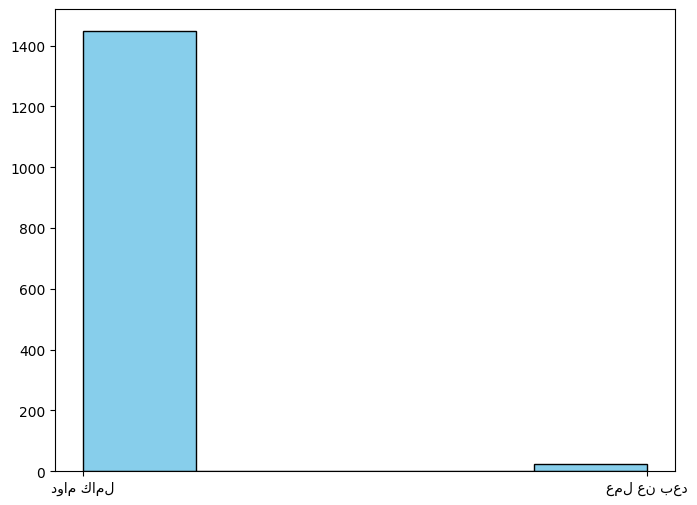

In [52]:
plt.figure(figsize=(8, 6))
plt.hist(data['contract'], bins=5, color='skyblue', edgecolor='black',label = [label[::-1] for label in data['contract']]
)  # Adjust the number of bins as needed

plt.show()

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

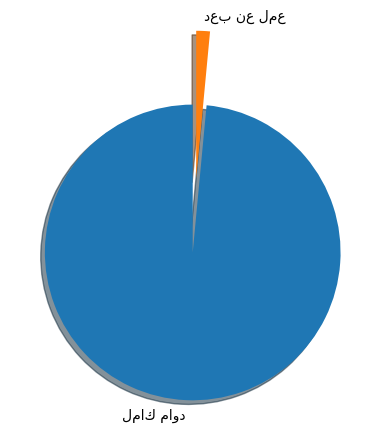

In [53]:

#pie chart contract 

con = data['contract'].value_counts()
reversed_labels = [label[::-1] for label in con.index]

plt.pie(x=con.values,
        labels=reversed_labels,
        startangle=90,
        shadow=True,
        explode=[0.3, 0.2]
       )

plt.show()

# x = [2, 4, 6, 8, 10]
# y = [6, 7, 8, 9, 10]
# xlbl = get_display( arabic_reshaper.reshape('الفواصل'.decode('utf8')))
# ylbl = get_display( arabic_reshaper.reshape('الترتيبات'.decode('utf8')))
# plt.bar(x, y, label='Bar1', color='red')
# plt.xlabel(xlbl, fontdict=None, labelpad=None)
# plt.ylabel(ylbl, fontdict=None, labelpad=None)
# plt.show()

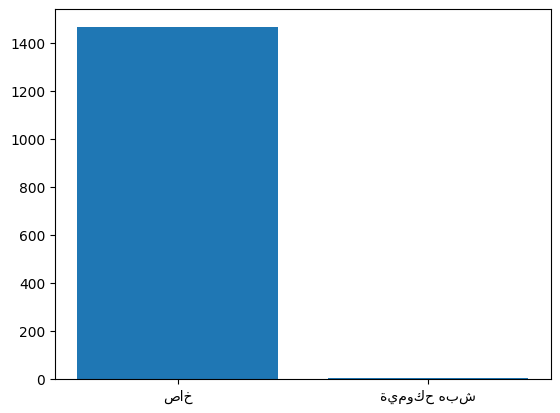

In [54]:
#bar chart comp_type 
con = data['comp_type'].value_counts()

reversed_labels = [label[::-1] for label in con.index]

plt.bar(range(len(con)), con.values, tick_label=reversed_labels)

plt.show()


#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

Text(0.5, 1.0, 'Boxplot of Positions')

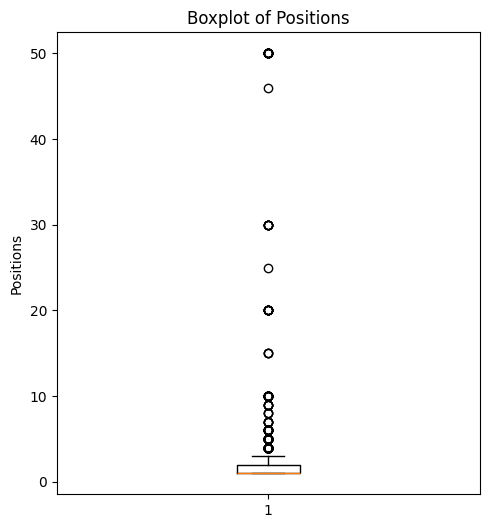

In [55]:
# Boxplot for positions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data['positions'])
plt.ylabel('Positions')
plt.title('Boxplot of Positions')

Text(0.5, 1.0, 'Histogram of Positions')

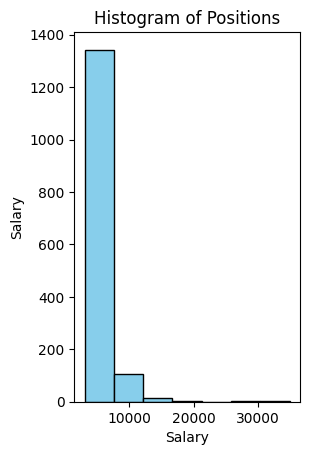

In [56]:

# Hist for positions
plt.subplot(1, 2, 2)
plt.hist(data['Salary'], bins=7, color='skyblue', edgecolor='black')  
plt.xlabel('Salary')
plt.ylabel('Salary')
plt.title('Histogram of Positions')


### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

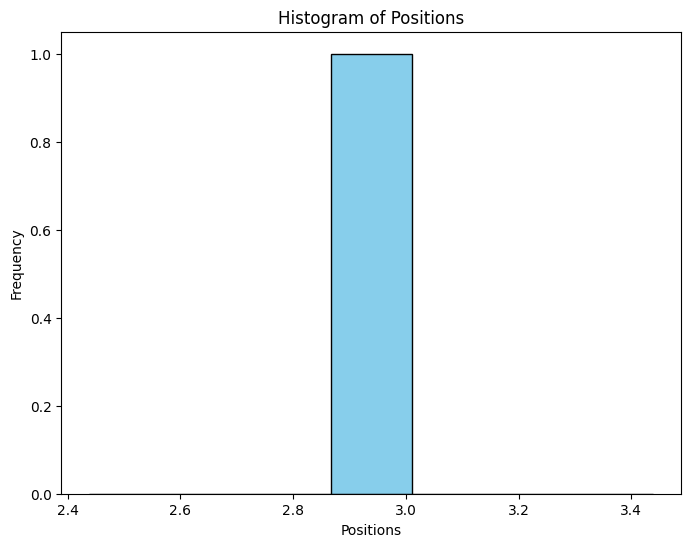

In [57]:
plt.figure(figsize=(8, 6))
plt.hist(data['positions'].mean(), bins=7, color='skyblue', edgecolor='black')  
plt.xlabel('Positions')
plt.ylabel('Frequency')
plt.title('Histogram of Positions')

plt.show()

In [58]:
data.describe().T

count         mean          std     min     25%     50%  \
positions     1470.0     2.938776     6.400864     1.0     1.0     1.0   
exper(Years)  1470.0     1.278912     1.879568     0.0     0.0     0.0   
Salary        1470.0  5294.650340  2296.926479  3000.0  4000.0  4500.0   

                 75%      max  
positions        2.0     50.0  
exper(Years)     2.0     12.0  
Salary        6000.0  35000.0

In [59]:
data.describe(include='object').T

count unique                                                top  \
job_title     1470    324                                               بائع   
job_desc      1470    438  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
job_tasks     1470    444  ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
comp_name     1470    886  شركه العرض المتقن للخدمات التجارية شركة مساهمة...   
comp_type     1470      2                                                خاص   
comp_size     1470      8                                        صغيرة فئة ب   
eco_activity  1470    362                                               اخرى   
qualif        1470    616                                             لايوجد   
region        1470     14                                             الرياض   
city          1470    114                                          AR RIYADH   
benefits      1470    393                               ['Salary', '4000.0']   
contract      1470      2                                          دوام كامل   
gender        1470      3                                               both   

              freq  
job_title       98  
job_desc        93  
job_tasks       90  
comp_name       16  
comp_type     1465  
comp_size      635  
eco_activity    90  
qualif         690  
region         622  
city           523  
benefits       449  
contract      1448  
gender         587

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

<Axes: xlabel='region', ylabel='Count'>

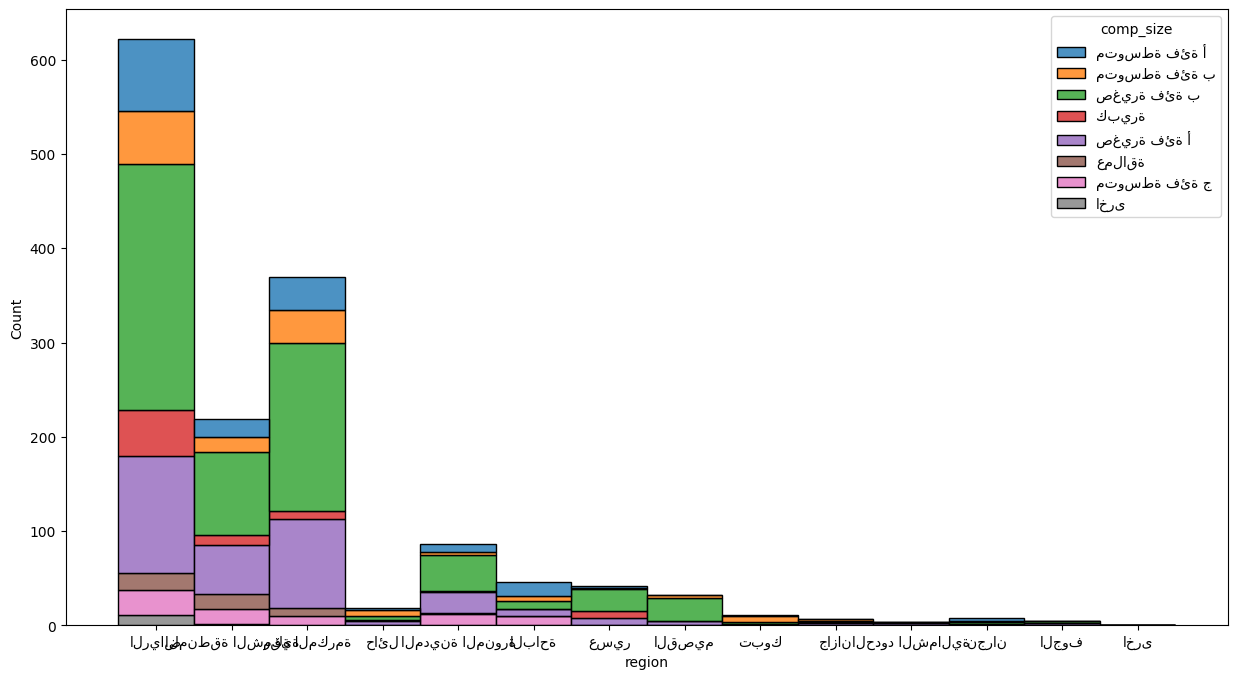

In [60]:

plt.figure(figsize=(15,8))
sns.histplot(
    data,
    x="region",
    hue="comp_size", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

In [61]:
data.dtypes

job_title       object
job_desc        object
job_tasks       object
comp_name       object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions        int32
exper(Years)     int64
gender          object
Salary           int32
dtype: object

**Categorical & numerical --> (scatter plot, histogram, box plot)**

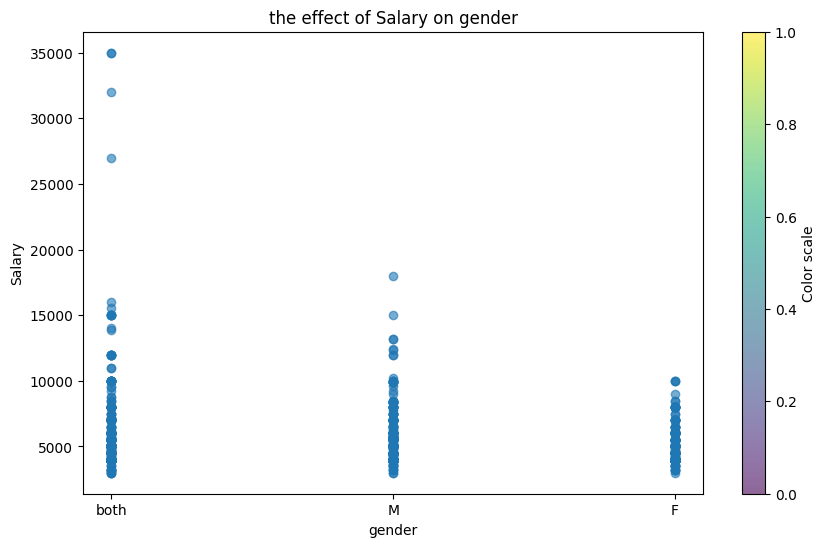

In [62]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['gender'], data['Salary'], alpha=0.6)
plt.xlabel('gender')
plt.ylabel('Salary')
plt.title('the effect of Salary on gender')
plt.colorbar(scatter, label='Color scale')
plt.show()

**numerical & numerical --> (Scatter plot, line chart)**

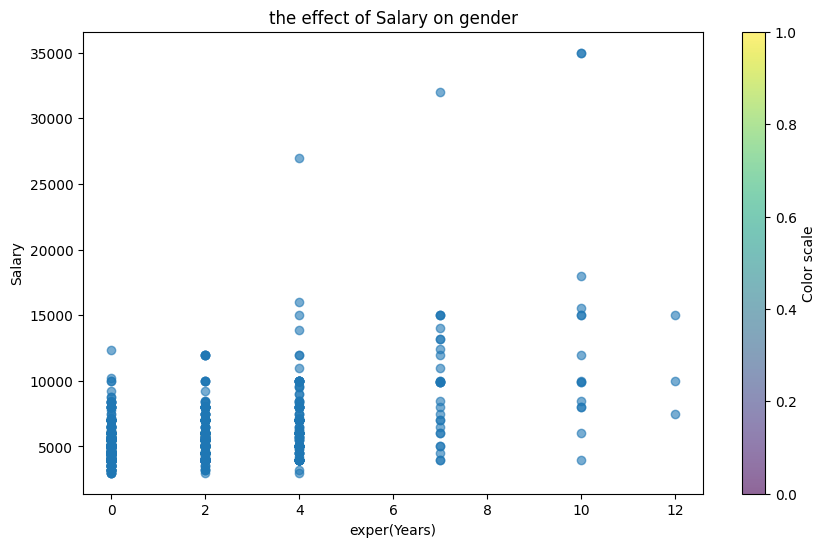

In [63]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['exper(Years)'], data['Salary'], alpha=0.6)
plt.xlabel('exper(Years)')
plt.ylabel('Salary')
plt.title('the effect of Salary on gender')
plt.colorbar(scatter, label='Color scale')
plt.show()

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

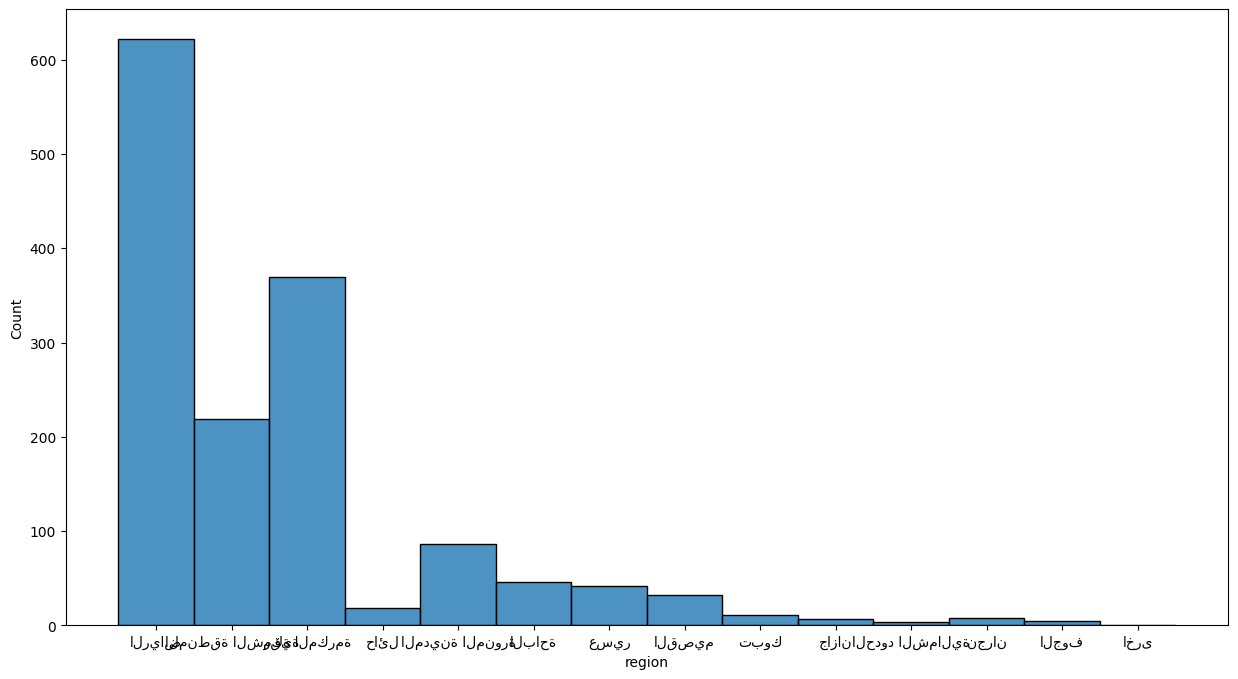

In [64]:
#Q1
plt.figure(figsize=(15, 8))
sns.histplot(data=data, x="region", alpha=0.8)



plt.show()

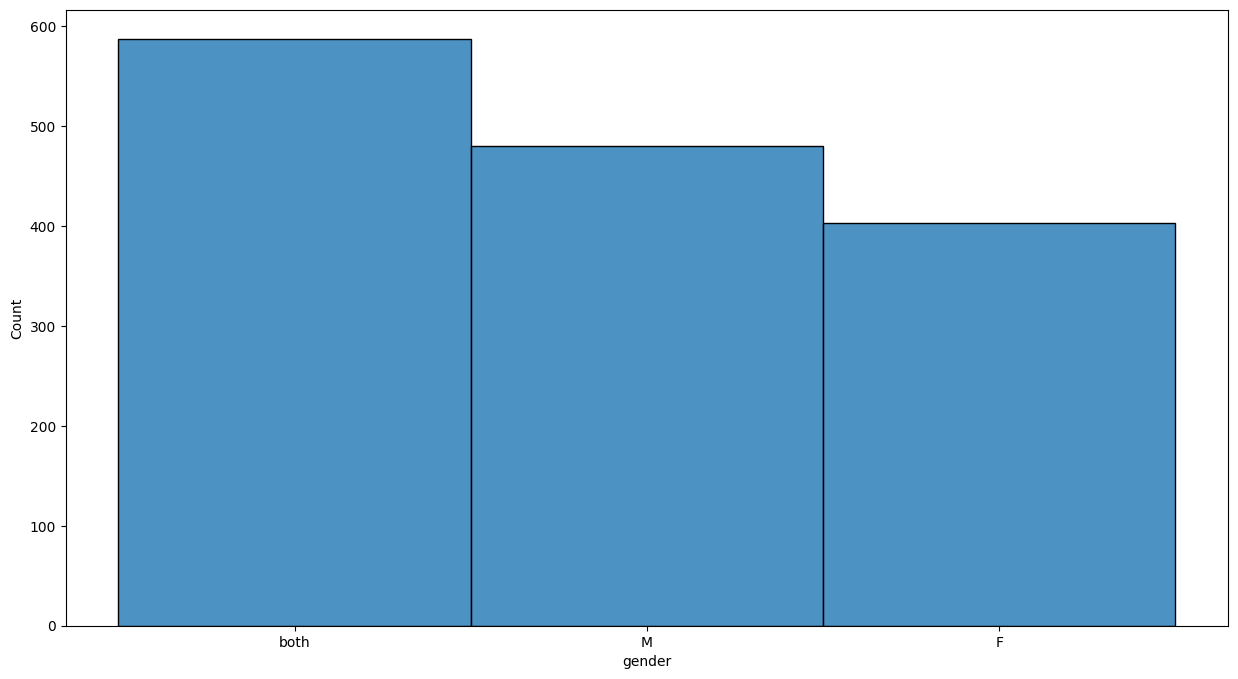

In [65]:
#Q2
plt.figure(figsize=(15, 8))
sns.histplot(data=data, x="gender", alpha=0.8)



plt.show()


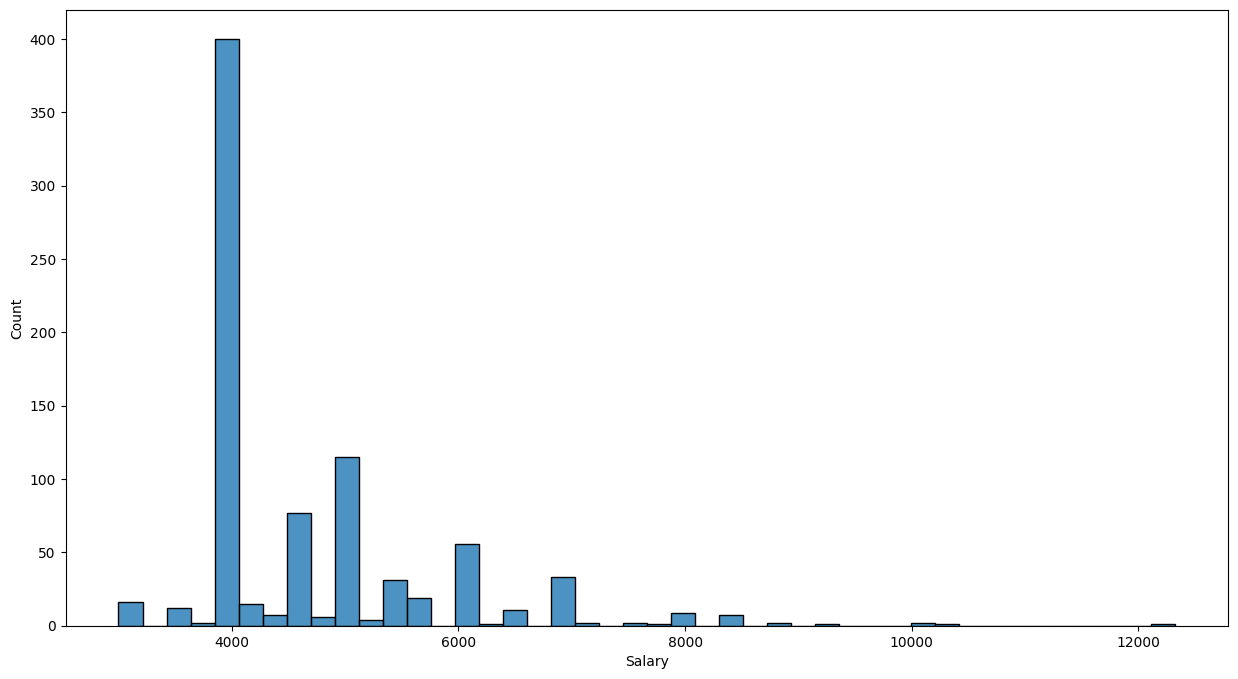

In [66]:
#Q3
sal=data[data['exper(Years)']==0]

plt.figure(figsize=(15, 8))
sns.histplot(data=sal, x="Salary", alpha=0.8)



plt.show()


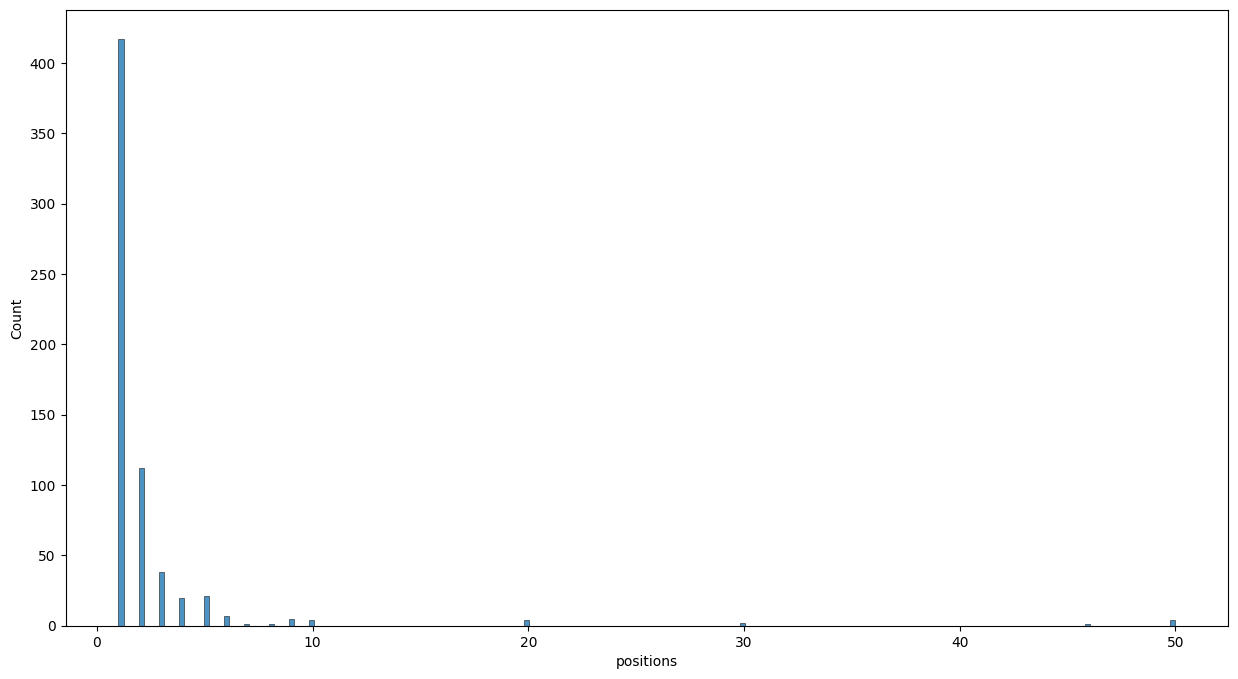

In [67]:
sal=data[data['exper(Years)']==0]
exp=data[data['exper(Years)']>0]

plt.figure(figsize=(15, 8))
sns.histplot(data=exp, x="positions", alpha=0.8)



plt.show()


In [68]:
data.columns

Index(['job_title', 'job_desc', 'job_tasks', 'comp_name', 'comp_type',
       'comp_size', 'eco_activity', 'qualif', 'region', 'city', 'benefits',
       'contract', 'positions', 'exper(Years)', 'gender', 'Salary'],
      dtype='object')

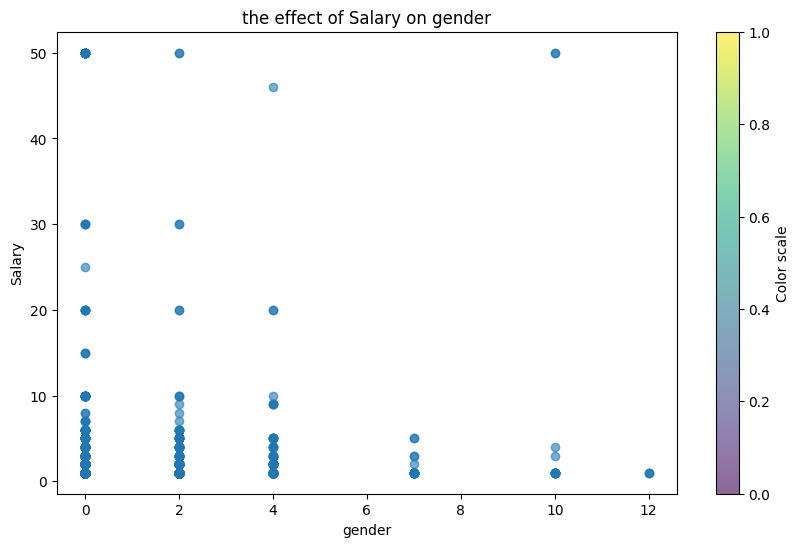

In [69]:
sal=data[data['exper(Years)']==0]
exp=data[data['exper(Years)']>0]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['exper(Years)'], data['positions'], alpha=0.6)
plt.xlabel('gender')
plt.ylabel('Salary')
plt.title('the effect of Salary on gender')
plt.colorbar(scatter, label='Color scale')
plt.show()

In [71]:
corr_matrix = data.select_dtypes(include=np.number).corr()
corr_matrix

positions  exper(Years)    Salary
positions      1.000000     -0.038018  0.094005
exper(Years)  -0.038018      1.000000  0.520014
Salary         0.094005      0.520014  1.000000

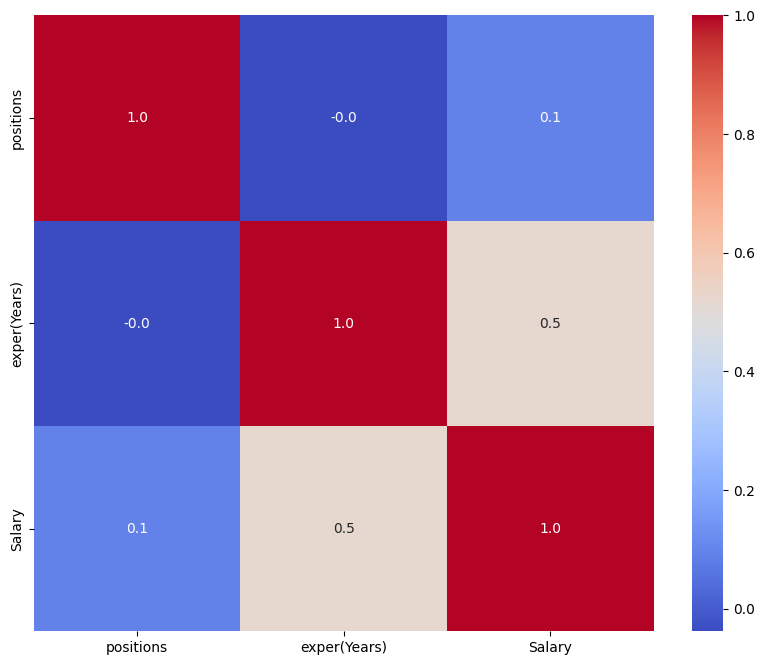

In [72]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

# Show the plot
plt.show()

In [ ]:
data['fe'] = data['exper(Years)'].map(lambda x: 'fresh' if x == 0 else 'expert')
data

job_title  \
0                         محاسب   
1                          بائع   
2     أخصائي عمليات موارد بشرية   
3               ميكانيكي سيارات   
4                         محاسب   
...                         ...   
1465        مهندس تقنية معلومات   
1466                     سكرتير   
1467                      صيدلي   
1468        مشغل آلة تشطيب رخام   
1469                      صيدلي   

                                               job_desc  \
0     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
2     ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
3     ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...   
4     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...   
...                                                 ...   
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...   
1466  ['دعم المدير أو الإدارة من خلال كتابة الوثائق ...   
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
1468  ['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...   
1469  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   

                                              job_tasks  \
0     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
1     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
2     ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
3     ['   فحص أداء المعدّات الكهربائية والميكانيكية...   
4     ['   تدقيق المطالبات المالية والتأكد من اكتمال...   
...                                                 ...   
1465  ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...   
1466  ['   تدوين الملاحظات، التي يتم إملاؤها، بطريقة...   
1467  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
1468  ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...   
1469  ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   

                                              comp_name comp_type  \
0                              شركة مقر العالم للسفريات       خاص   
1                          شركة عالم الكهرباء للمقاولات       خاص   
2                                       شركه دار السلام       خاص   
3                               مؤسسة لمكو لغيار الزيوت       خاص   
4                          مؤسسة فكرة اليمامة للمقاولات       خاص   
...                                                 ...       ...   
1465                  مطعم الاوراق الخضر لتقديم الوجبات       خاص   
1466         شركة ملتقى التجار لحاضنات و مسرعات الأعمال       خاص   
1467                شركة تقنية الدواجن والألبان للتجارة       خاص   
1468  مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...       خاص   
1469                شركة تقنية الدواجن والألبان للتجارة       خاص   

         comp_size                                       eco_activity  \
0     متوسطة فئة أ                        أنشطة وكالات السياحة والسفر   
1     متوسطة فئة ب  تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...   
2     متوسطة فئة أ               ترميمات المباني السكنية والغير سكنية   
3      صغيرة فئة ب                                               اخرى   
4            كبيرة                   الإنشاءات العامة للمباني السكنية   
...            ...                                                ...   
1465   صغيرة فئة ب                                  المطاعم مع الخدمة   
1466   صغيرة فئة ب                       أنشطة حاضنات ومسرعات الأعمال   
1467   صغيرة فئة ب                                               اخرى   
1468   صغيرة فئة أ                                               اخرى   
1469   صغيرة فئة ب                                               اخرى   

                                                 qualif           region  \
0        ['Language data', 'اللغة الانجليزية', 'محترف']           الرياض   
1                                                لايوجد  المنطقة الشرقية   
2              ['Language data', 'الانجليزيه', 'محترف']           الرياض   
3     ['Skill data', 'صيانة السيارات وتقييم الاعطال'...  المنطقة الشرقية   
4     ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...           الرياض   
...                  

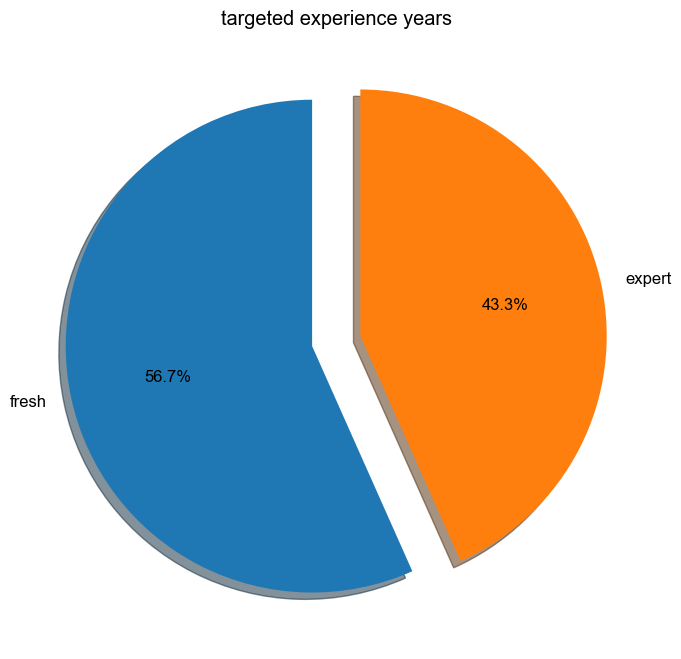

In [ ]:
# fresh_or_expert=fe معنى 

con = data['fe'].value_counts()

plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(x=con.values, labels=con.index, startangle=90, shadow=True, explode=[0.1, 0.1], autopct='%1.1f%%')

# Add centered text

plt.title('targeted experience years')
plt.show()


In [ ]:
data['job_title'].value_counts().head(5)

# plt.bar(job.index,
#         job.values,
       
#        )
# plt.show

job_title
بائع            98
محاسب           89
أخصائي تسويق    54
مساعد إداري     45
موظف استقبال    45
Name: count, dtype: int64

In [ ]:
f=data[(data['fe']=='fresh')]

f.loc[f['Salary'].nlargest(20).index]
# plt.bar(job.index,
#         job.values,
       
#        )
# plt.show

job_title  \
533                 مساعد إداري   
742                 رئيس تنفيذي   
227                   طبيب نفسي   
1242                 محلل مبرمج   
344                  سائق حافلة   
359                أخصائي تسويق   
361   أخصائي عمليات موارد بشرية   
701               سكرتير تنفيذي   
144              مهندس ميكانيكي   
145                  مهندس مواد   
146                  مهندس مدني   
147               مهندس كهربائي   
796                 مهندس صناعي   
798               مهندس كهربائي   
374                  مراقب مالي   
497                   مدير مكتب   
602                       صيدلي   
660               أخصائي إعلامي   
722                  محلل مبرمج   
723                  محلل مبرمج   

                                               job_desc  \
533   ['متابعة تنفيذ القرارات الادارية الصادرة عن ال...   
742   ['المشاركة في وضع الأهداف والخطط الإستراتيجية ...   
227   ['تشخيص الأمراض العقلية والاضطرابات العاطفية و...   
1242  ['القيام بالتحليل والبرمجة في تطوير وتنفيذ ودع...   
344   ['قيادة الحافلة لنقل الركاب والالتزام بقواعد ا...   
359   ['تحديد الأهداف وتطوير السياسات التسويقية للسل...   
361   ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...   
701   ['تنظيم المواعيد وإعداد المذكرات وإجراء المراس...   
144   ['إعداد التصاميم والمخططات لمشاريع وأعمال الهن...   
145   ['دراسة المواد وتصميمها لاستخدامها في مجموعة م...   
146   ['دراسة طبوغرافية وجيولوجية الموقع الإنشائي ون...   
147   ['إعداد التصاميم والمخططات الكهربائية لمشاريع ...   
796   ['إجراء الدراسات المتعلقة بالعمليات الإنتاجية ...   
798   ['إعداد التصاميم والمخططات الكهربائية لمشاريع ...   
374   ['تدقيق امتثال المستندات المالية للأنظمة والقو...   
497   ['الإشراف المباشرعلى أنشطة إدارة وتخطيط وتنظيم...   
602   ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...   
660   ['مراجعة محتوى وتحليل مستوى الرسائل الإعلامية ...   
722   ['القيام بالتحليل والبرمجة في تطوير وتنفيذ ودع...   
723   ['القيام بالتحليل والبرمجة في تطوير وتنفيذ ودع...   

                                              job_tasks  \
533   ['   تنفيذ التعليمات الادارية الصادرة عن الرئي...   
742   ['   المشاركة في وضع الإستراتيجية العامة وتحقي...   
227   ['   مقابلة المرضى وفحصهم ومراجعة سجلهم الطبي،...   
1242  ['   تطوير التطبيقات وقواعد البيانات من خلال ت...   
344   ['   قيادة الحافلة لنقل الركاب من منطقة إلى من...   
359   ['   تحديد الأهداف العامة والفرعية للتسويق وتط...   
361   ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...   
701   ['   تنظيم مواعيد المدير/الرئيس وتذكيره بها، و...   
144   ['   إعداد التصاميم والمخططات لمشاريع أعمال ال...   
145   ['   دراسة المواد وتصميمها لاستخدامها في مجموع...   
146   ['   دراسة طبوغرافية وجيولوجية الموقع الإنشائي...   
147   ['   إعداد التصاميم والمخططات الكهربائية لمشار...   
796   ['   دراسة وظائف الوحدات الإدارية وهياكلها الت...   
798   ['   إعداد التصاميم والمخططات الكهربائية لمشار...   
374   ['   يجب توفر لغه انجليزيه ممتازه كون الشركه ن...   
497   ['   إدارة وتوجيه عمليات وإجراءات تنسيق اجتماع...   
602   ['   دراسة مواصفات وتركيبات الادوية والعقاقير ...   
660   ['   مراجعة محتوى وتحليل مستوى الرسائل الإعلام...   
722   ['   تطوير التطبيقات وقواعد البيانات من خلال ت...   
723   ['   تطوير التطبيقات وقواعد البيانات من خلال ت...   

                                              comp_name   comp_type  \
533                    شركة قطاف التجارية شركة شخص واحد         خاص   
742           جاروديه الخيريه للخدمات الاجتماعيه /جمعيه  شبه حكومية   
227                  شركة أمان للامراض النفسية والعصبية         خاص   
1242               شركـة ايجاد التقنية لتقنية المعلومات         خاص   
344      مؤسسة عبدالله علي محسن حدادي للخدمات اللوجستية         خاص   
359   اللجنة الوطنية لرعاية السجناءوالمفرج عنهم  بال...         خاص   
361   اللجنة الوطنية لرعاية السجناءوالمفرج عنهم  بال...         خاص   
701              شركة أصداف ابحر العقاريه شركة شخص واحد         خاص   
144     شركة عايد دحيم الحمود وشركاه للتجارة والمقاولات         خاص   
145     شركة عايد دحيم الحمود وشركاه للتجارة والمقاولات         خاص   
146     شركة عايد دحيم ال

In [ ]:

re=data['region'].value_counts().head(3)

re


region
الرياض             622
مكة المكرمة        369
المنطقة الشرقية    219
Name: count, dtype: int64